<a href="https://colab.research.google.com/github/Faridef/Faridef/blob/main/Indonesia_Healthcare22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('indo.xlsx')
df.head()

,time,x1,x2,x3,x4,x5,x6,x7,y,y_e12
0,1996,0.505871,0.644390,62.36,7.566959,31.60,52.264744,8.676510,2.273697e+11,0.227370
1,1997,0.560647,0.610687,61.68,6.842805,30.31,55.993859,12.571376,2.157490e+11,0.215749
2,1998,0.480243,0.666057,67.78,5.693508,27.43,96.186192,75.271169,9.544555e+10,0.095446
3,1999,0.464260,0.554159,73.94,6.604457,22.14,62.943913,14.161196,1.400014e+11,0.140001
4,2000,0.492913,0.499936,61.65,6.531995,22.25,71.436876,20.447457,1.650210e+11,0.165021


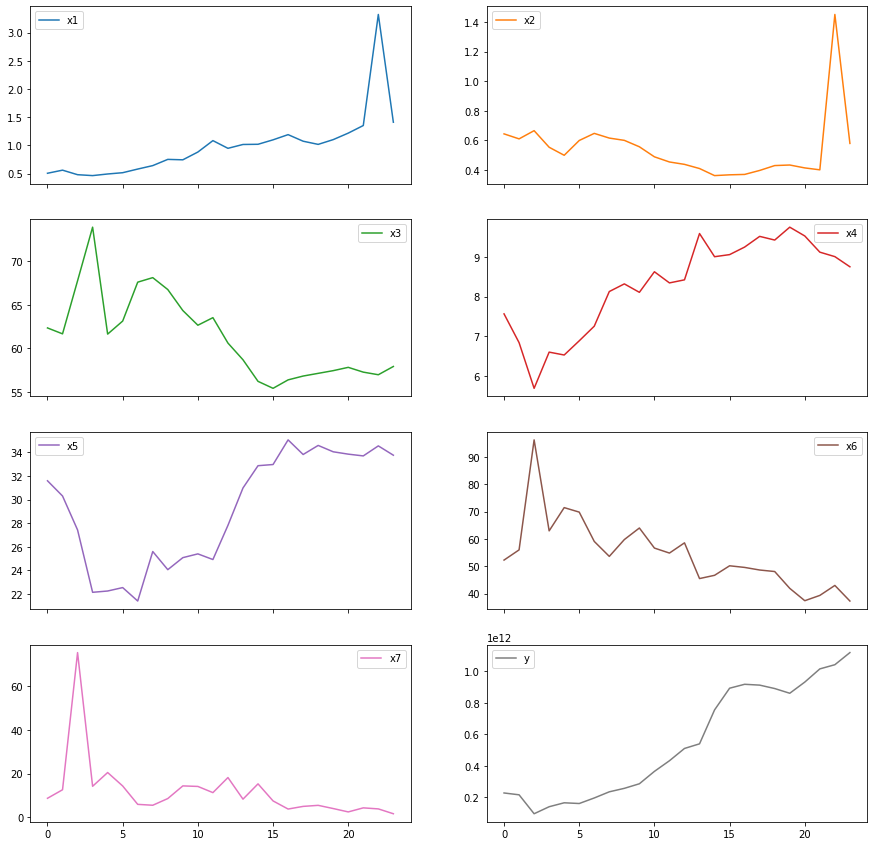

In [ ]:
df.loc[:, 'x1': 'y'].plot(subplots=True, layout=(4,2), figsize=(15, 15));

In [ ]:
df_corr = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y']]
r = df_corr.corr()
r.square = r**r
r

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,x1,x2,x3,x4,x5,x6,x7,y
x1,1.000000,0.593399,-0.542790,0.543381,0.564026,-0.543773,-0.337170,0.710765
x2,0.593399,1.000000,0.169452,-0.234231,-0.055819,0.091045,0.062821,-0.061129
x3,-0.542790,0.169452,1.000000,-0.740635,-0.835644,0.644919,0.388261,-0.835939
x4,0.543381,-0.234231,-0.740635,1.000000,0.709356,-0.841738,-0.646890,0.826102
x5,0.564026,-0.055819,-0.835644,0.709356,1.000000,-0.675192,-0.298625,0.862123
x6,-0.543773,0.091045,0.644919,-0.841738,-0.675192,1.000000,0.846640,-0.782807
x7,-0.337170,0.062821,0.388261,-0.646890,-0.298625,0.846640,1.000000,-0.484100
y,0.710765,-0.061129,-0.835939,0.826102,0.862123,-0.782807,-0.484100,1.000000


In [ ]:
df = df[['year', 'population', 'urban', 'male_u5', 'female_u5', 'male_ex', 'female_ex']]
df.head()

,year,population,urban,male_u5,female_u5,male_ex,female_ex
0,1960,87751068,14.586,236.9,208.7,44.475,49.009
1,1961,90098394,14.821,230.7,203.2,45.098,49.604
2,1962,92518377,15.058,224.8,197.9,45.713,50.185
3,1963,95015297,15.299,218.9,192.6,46.322,50.752
4,1964,97596733,15.543,213.1,187.2,46.927,51.306


In [ ]:
#untuk cek value 0 / NaN
df.isnull().sum()

year          0
population    0
urban         0
male_u5       2
female_u5     6
male_ex       0
female_ex     0
dtype: int64

In [ ]:
#interpolasi = mengisi data yang kosong 
#axis = 0 perbaris ada disumbu x
df =  df.interpolate(method = 'linear', axis=0)
df.isnull().sum()

year          0
population    0
urban         0
male_u5       0
female_u5     0
male_ex       0
female_ex     0
dtype: int64

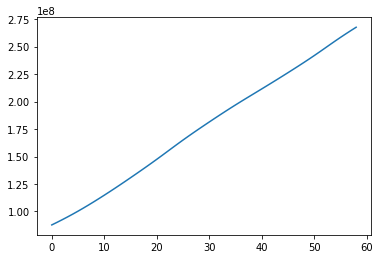

In [ ]:
#grafik line
df['population'].plot.line()

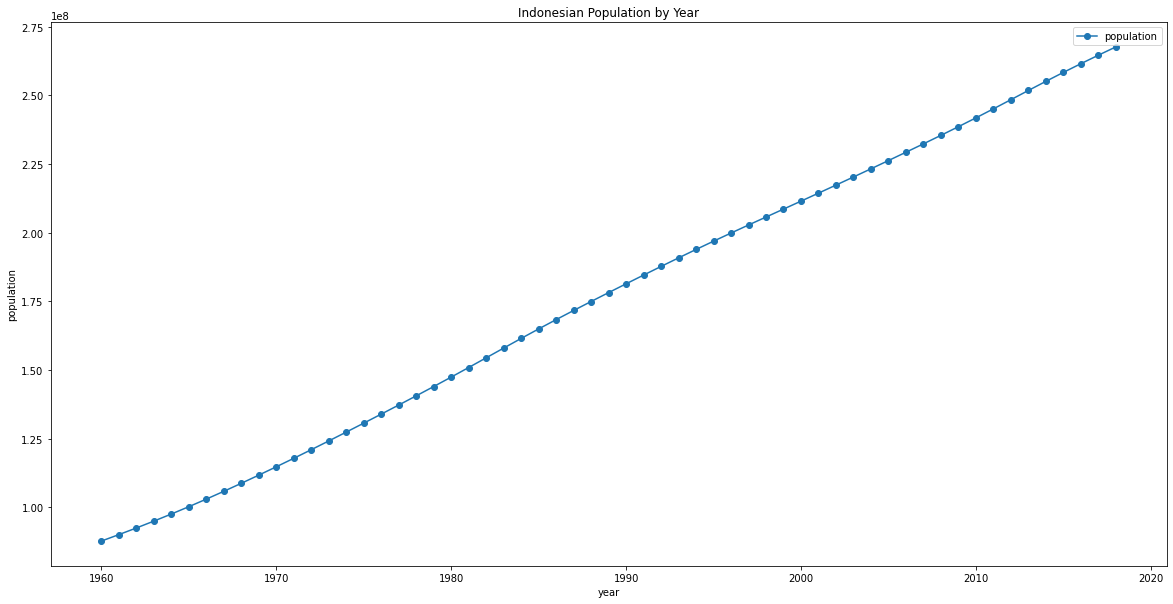

In [ ]:
df.plot.line(
    x='year',
    y='population',
    figsize = (20, 10),
    title = 'Indonesian Population by Year',
    xlabel = 'year',
    ylabel = 'population',
    marker = 'o',
)

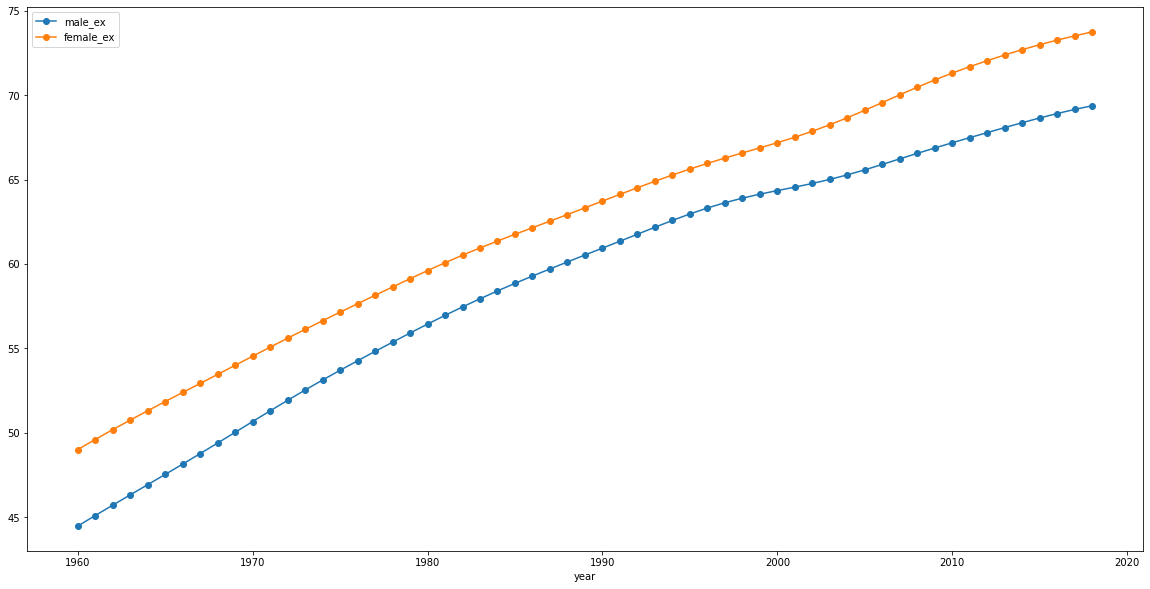

In [ ]:
df.plot.line(
    x= 'year',
    y= ['male_ex', 'female_ex'],
    figsize = (20, 10),
    marker = 'o',
)

In [ ]:
#untuk melihat selisih antara laki laki dan perempuan
#margin u5 dan margin ex itu per 1000
df['margin_u5'] = df['male_u5']-df['female_u5']
df['margin_ex'] = df['female_ex']-df['male_ex']
df.head()


,year,population,urban,male_u5,female_u5,male_ex,female_ex,margin_u5,margin_ex
0,1960,87751068,14.586,236.9,208.7,44.475,49.009,28.2,4.534
1,1961,90098394,14.821,230.7,203.2,45.098,49.604,27.5,4.506
2,1962,92518377,15.058,224.8,197.9,45.713,50.185,26.9,4.472
3,1963,95015297,15.299,218.9,192.6,46.322,50.752,26.3,4.430
4,1964,97596733,15.543,213.1,187.2,46.927,51.306,25.9,4.379


In [ ]:
#menyamakan distribusi
data = df[['margin_u5', 'margin_ex']]
scaler = MinMaxScaler().fit(data)
hasil = scaler.transform(data)
print(hasil)

[[1.         1.        ]
 [0.97058824 0.98520085]
 [0.94537815 0.96723044]
 [0.92016807 0.94503171]
 [0.90336134 0.91807611]
 [0.8907563  0.8858351 ]
 [0.87394958 0.8461945 ]
 [0.85714286 0.8012685 ]
 [0.84453782 0.75264271]
 [0.82773109 0.70137421]
 [0.81512605 0.64852008]
 [0.79411765 0.59672304]
 [0.77310924 0.54704017]
 [0.74789916 0.50105708]
 [0.73109244 0.45983087]
 [0.70168067 0.42230444]
 [0.68067227 0.39006342]
 [0.65966387 0.35940803]
 [0.6302521  0.33192389]
 [0.60504202 0.30443975]
 [0.57563025 0.27801268]
 [0.54621849 0.25105708]
 [0.51680672 0.2230444 ]
 [0.49159664 0.19450317]
 [0.46638655 0.16649049]
 [0.44537815 0.14006342]
 [0.42857143 0.11733615]
 [0.41176471 0.09989429]
 [0.38655462 0.08826638]
 [0.37815126 0.08086681]
 [0.35294118 0.07610994]
 [0.34033613 0.06976744]
 [0.32352941 0.05919662]
 [0.30252101 0.04386892]
 [0.28571429 0.02589852]
 [0.26470588 0.00951374]
 [0.24789916 0.        ]
 [0.23529412 0.00211416]
 [0.22268908 0.01955603]
 [0.19327731 0.05285412]


In [ ]:
df[['none_u5', 'none_ex']] = hasil
df.head()

,year,population,urban,male_u5,female_u5,male_ex,female_ex,margin_u5,margin_ex,none_u5,none_ex
0,1960,87751068,14.586,236.9,208.7,44.475,49.009,28.2,4.534,1.000000,1.000000
1,1961,90098394,14.821,230.7,203.2,45.098,49.604,27.5,4.506,0.970588,0.985201
2,1962,92518377,15.058,224.8,197.9,45.713,50.185,26.9,4.472,0.945378,0.967230
3,1963,95015297,15.299,218.9,192.6,46.322,50.752,26.3,4.430,0.920168,0.945032
4,1964,97596733,15.543,213.1,187.2,46.927,51.306,25.9,4.379,0.903361,0.918076


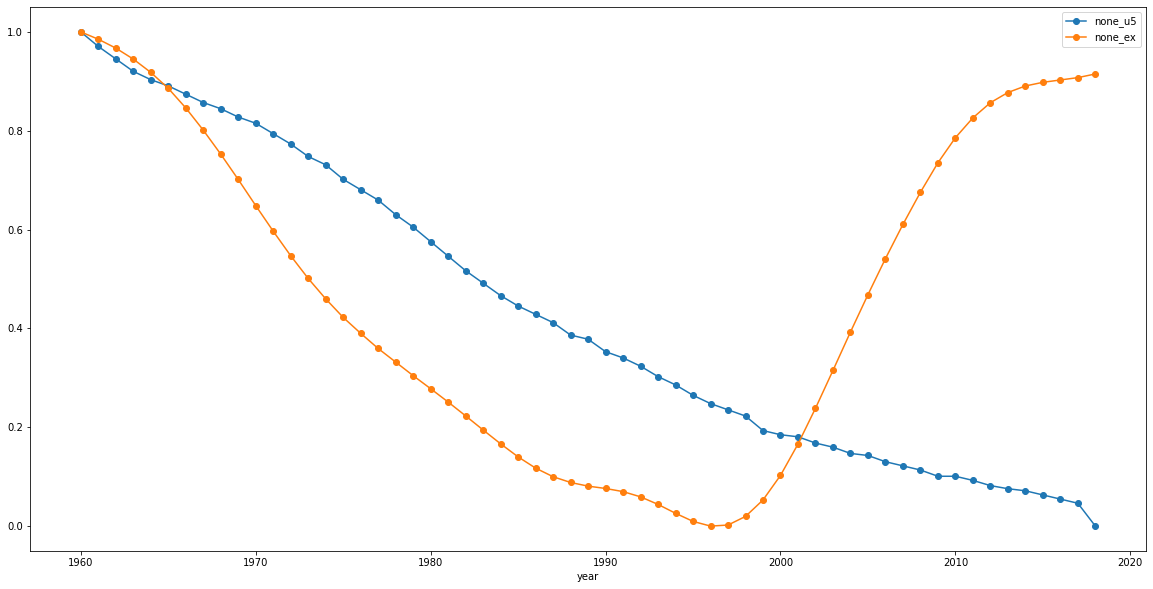

In [ ]:
df.plot.line(
    x= 'year',
    y= ['none_u5', 'none_ex'],
    figsize = (20, 10),
    marker = 'o',
)

In [ ]:
data_corr = df[['population', 'male_u5', 'female_u5', 'male_ex', 'female_ex', 'margin_u5', 'margin_ex']]
r = data_corr.corr(method='pearson')
r

,population,male_u5,female_u5,male_ex,female_ex,margin_u5,margin_ex
population,1.000000,-0.981359,-0.979790,0.987384,0.996424,-0.988442,-0.086649
male_u5,-0.981359,1.000000,0.999924,-0.998646,-0.992229,0.995498,0.262798
female_u5,-0.979790,0.999924,1.000000,-0.998288,-0.991474,0.994255,0.267200
male_ex,0.987384,-0.998646,-0.998288,1.000000,0.996261,-0.996326,-0.232904
female_ex,0.996424,-0.992229,-0.991474,0.996261,1.000000,-0.992997,-0.148019
margin_u5,-0.988442,0.995498,0.994255,-0.996326,-0.992997,1.000000,0.227587
margin_ex,-0.086649,0.262798,0.267200,-0.232904,-0.148019,0.227587,1.000000


In [ ]:
# ** = kuadrat
r_square = r**2
r_square

,population,male_u5,female_u5,male_ex,female_ex,margin_u5,margin_ex
population,1.000000,0.963065,0.959988,0.974927,0.992860,0.977018,0.007508
male_u5,0.963065,1.000000,0.999848,0.997294,0.984519,0.991016,0.069063
female_u5,0.959988,0.999848,1.000000,0.996579,0.983020,0.988543,0.071396
male_ex,0.974927,0.997294,0.996579,1.000000,0.992537,0.992665,0.054244
female_ex,0.992860,0.984519,0.983020,0.992537,1.000000,0.986043,0.021910
margin_u5,0.977018,0.991016,0.988543,0.992665,0.986043,1.000000,0.051796
margin_ex,0.007508,0.069063,0.071396,0.054244,0.021910,0.051796,1.000000


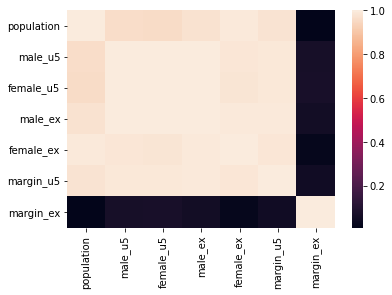

In [ ]:
sns.heatmap(r_square);

In [ ]:
endog = df['population']
model =sm.tsa.SARIMAX(endog, trend='c')
res = model.fit()

print(res.summary())


                           Statespace Model Results                           
Dep. Variable:             population   No. Observations:                   59
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -981.166
Date:                Wed, 02 Mar 2022   AIC                           1968.332
Time:                        13:36:22   BIC                           1974.565
Sample:                             0   HQIC                          1970.765
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.811e+06   2.15e-12   1.31e+18      0.000    2.81e+06    2.81e+06
ar.L1          0.9856      0.000   3170.201      0.000       0.985       0.986
sigma2      9.605e+12   1.65e-19   5.83e+31      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
df.tail(1)

,year,population,urban,male_u5,female_u5,male_ex,female_ex,margin_u5,margin_ex,none_u5,none_ex
58,2018,267663435,55.325,27.3,22.9,69.375,73.748,4.4,4.373,0.0,0.914905


In [ ]:
# 3 di forecast adalah 3 tahun kedepan
# 0.05 = error
fcast = res.get_forecast(3)
print(fcast.summary_frame(alpha=0.05))

population          mean       mean_se  mean_ci_lower  mean_ci_upper
59          2.666172e+08  3.099252e+06   2.605427e+08   2.726916e+08
60          2.655860e+08  4.351536e+06   2.570571e+08   2.741148e+08
61          2.645696e+08  5.291442e+06   2.541986e+08   2.749407e+08
